<a href="https://colab.research.google.com/github/prasadgite/Data-Science-Journey/blob/main/EDA_01/titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show structure
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check missing values
print(df.isnull().sum())

# Fill Age and Embarked (for now, keep it simple)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many nulls) - Use errors='ignore' to prevent error if column doesn't exist
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Verify
df.info()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<ipython-input-5-cfc36e828f60>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-cfc36e828f60>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Survival rate by Gender

In [6]:
gender_survival=df.groupby('Sex')['Survived'].mean()
print(gender_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [7]:
class_survival = df.groupby('Pclass')['Survived'].mean()
print(class_survival)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [8]:
combined = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print(combined)


Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


Insights:

Females had a survival rate of ~74% vs males ~19%

1st class passengers had higher survival (~63%) than 3rd class (~24%)

Females in 1st class had the highest survival probability

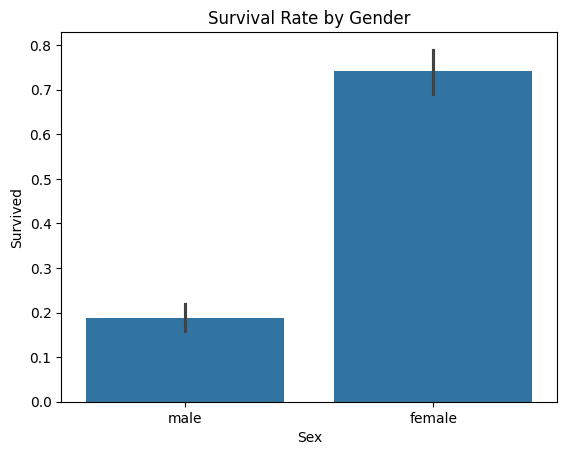

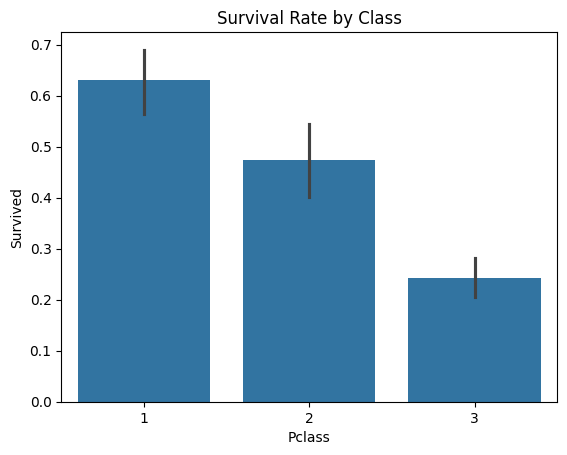

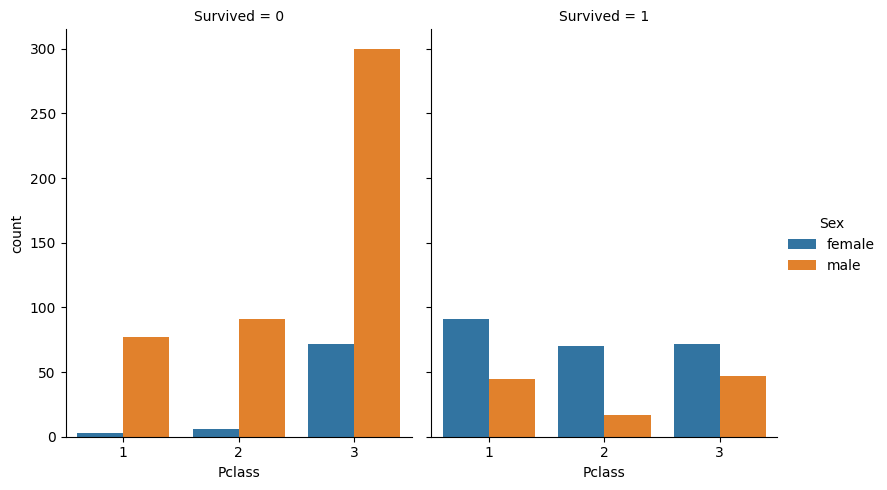

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Combined
sns.catplot(x='Pclass', hue='Sex', col='Survived',
            data=df, kind='count', height=5, aspect=.8)


In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['IsChild'] = df['Age'].apply(lambda x: 1 if x < 10 else 0)
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])


In [11]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


<Axes: xlabel='FamilySize', ylabel='Survived'>

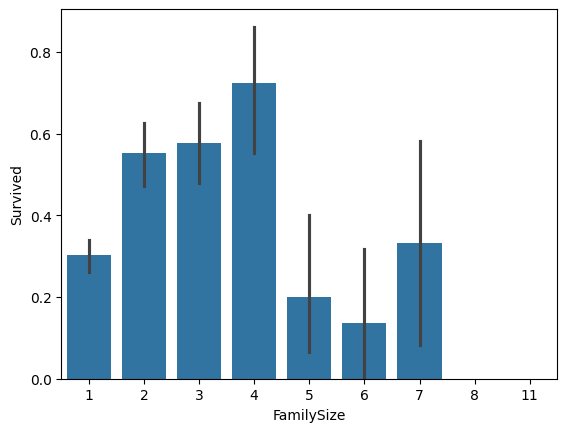

In [12]:
df[['SibSp', 'Parch', 'FamilySize']].head(10)
sns.barplot(x='FamilySize', y='Survived', data=df)


In [13]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


<Axes: xlabel='IsAlone', ylabel='Survived'>

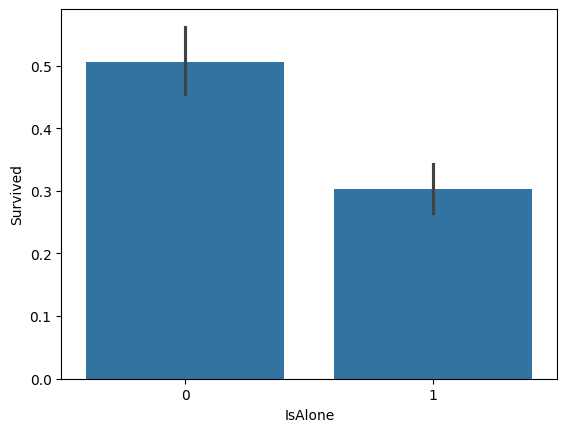

In [14]:
df[['FamilySize', 'IsAlone']].head(10)
sns.barplot(x='IsAlone', y='Survived', data=df)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Rare')])

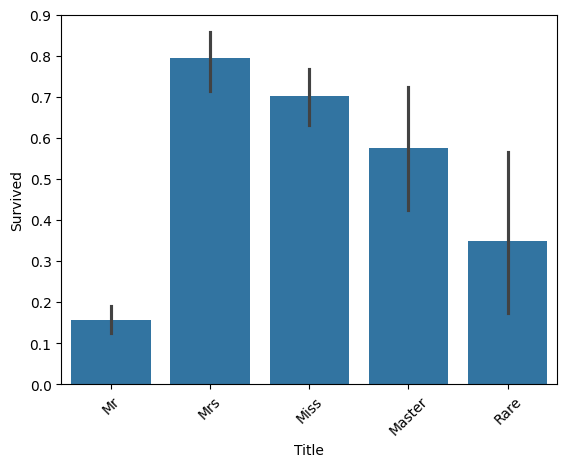

In [15]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col',
                                   'Don','Dr','Major','Rev','Sir',
                                   'Jonkheer','Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)


<Axes: xlabel='IsChild', ylabel='Survived'>

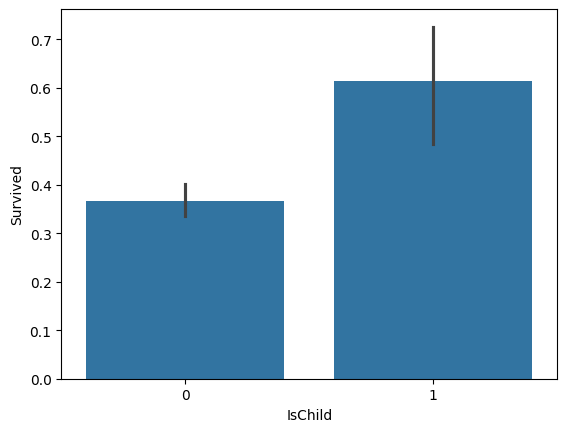

In [16]:
df['IsChild'] = df['Age'].apply(lambda x: 1 if x < 10 else 0)
df[['Age', 'IsChild']].head(10)
sns.barplot(x='IsChild', y='Survived', data=df)


<Axes: xlabel='FareBand', ylabel='Survived'>

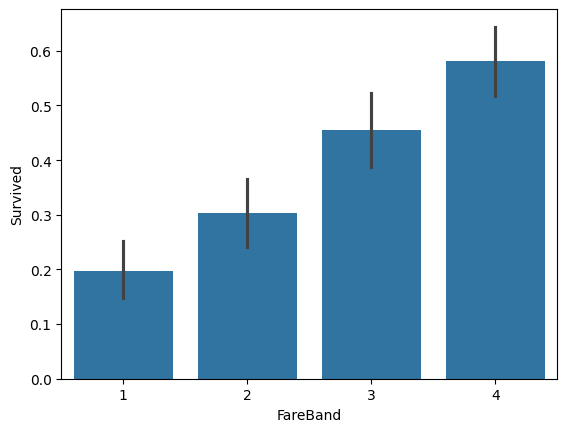

In [17]:
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])
df[['Fare', 'FareBand']].head(10)
sns.barplot(x='FareBand', y='Survived', data=df)


[link text](https://)

Now we need to create a machine learning model and a ML model always contains numerical  values. These values are then treated in order to train model

In [18]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode=['Sex','Embarked','Title','FareBand']
le=LabelEncoder()
for col in cols_to_encode:
  df[col]=le.fit_transform(df[col].astype(str))

In [19]:
df[cols_to_encode].head()


,Sex,Embarked,Title,FareBand
0,1,2,2,0
1,0,0,3,3
2,0,2,1,1
3,0,2,3,3
4,1,2,2,1


Selection of Features

In [20]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'IsChild']
X = df[features]
y = df['Survived']


Train-test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Logistic Regression Model

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=100000, solver='saga')  # saga or liblinear
model.fit(X_train, y_train)


LogisticRegression(max_iter=100000, solver='saga')

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7430167597765364
[[93 12]
 [34 40]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       105
           1       0.77      0.54      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



In [32]:
import joblib

# Save the model to a file
joblib.dump(model, 'titanic_logistic_model.pkl')


['titanic_logistic_model.pkl']

In [33]:
loaded_model = joblib.load('titanic_logistic_model.pkl')


In [36]:
git add 01_maths_statistics.ipynb titanic_logistic_model.pkl


SyntaxError: invalid decimal literal (<ipython-input-36-dbb008cf9681>, line 1)

In [38]:
!git clone https://github.com/prasadgite/Data-Science-Journey.git


Cloning into 'Data-Science-Journey'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 89.32 KiB | 1.26 MiB/s, done.


In [40]:
%cd Data-Science-Journey


/content/Data-Science-Journey


In [42]:
!git config --global user.email "prasadsgite@gmail.com"
!git config --global user.name "prasadgite"
